### Covid19 cases and Climate in Italy 

This notebook seeks to rudimentarily explore the relationship between coronavirus cases in Italy and the temperature and humidity in the corresponding regions. 

According to the WHO, a number of environmental factors can influence the spread of communicable diseases that can cause epidemics. The most important of these are:
1. Water supply
2. Sanitation facilities
3. Food
4. Climate

The underlying theory is the number of cases and the spread of previous infectious viruses demonstrate seasonal patterns, affected by climate, and so Covid19 should display similarity in this aspect. Plainly speaking, temperature and humidity, changed throughout seasons, have an effect on the number of virus contraction incidents. 

The following is a naive estimate of this relationship based on the number of confirmed cases in Italy as of March 16th, 2020 and the temperature and humidity of its regions. The hypothesis upon we are operating is that high temperature and humidity is corresponded to decreased number of reported covid-19 cases. 

In [1]:
import pandas as pd
from statsmodels.regression.linear_model import OLS
import numpy as np
import seaborn as sns

In [2]:
os.chdir('/Users/dangngochuy/Desktop/Hertie/Thesis/Covid19_vs_Climate/data')
df = pd.read_excel('Italy.xlsx', index_col=0)
df

<IPython.core.display.Javascript object>

,2020-03-16 00:00:00,2020-03-15 00:00:00,2020-03-14 00:00:00,2020-03-03 00:00:00,min,max,humidity
Lombardia,14649,13272,11685,1520,3,13,83
Emilia Romagna,3522,3093,2644,420,1,15,71
Veneto,2473,2170,1937,307,5,12,61
Marche,1242,1133,899,61,3,14,58
Piemonte,1516,1111,873,56,4,12,62
Toscana,866,781,630,19,3,18,46
Liguria,667,559,463,24,6,13,56
Lazio,523,436,357,14,1,13,61
Friuli Venezia Giulia,386,347,301,13,1,13,66
Trento,378,378,206,4,5,15,78


In [3]:
#Create new dataframe with desired columns 
y = np.log(df.iloc[:, 0]) #take log of number of cases
y.name = 'Infected cases (log)' 

#Temperature and Humidity parameter to toggle
temp = 15
humid = 75

#create features with max temperature - 15 and humidity - 80
x = df[['max', 'humidity']].sub([temp, humid])  
x.columns = ['Temp - 15oC', 'Humidity - 75%']

italy_df = pd.merge(left = x, right = y, left_on= x.index, right_on= y.index)
italy_df

,key_0,Temp - 15oC,Humidity - 75%,Infected cases (log)
0,Lombardia,-2,8,9.592127
1,Emilia Romagna,0,-4,8.166784
2,Veneto,-3,-14,7.813187
3,Marche,-1,-17,7.124478
4,Piemonte,-3,-13,7.323831
5,Toscana,3,-29,6.763885
6,Liguria,-2,-19,6.502790
7,Lazio,-2,-14,6.259581
8,Friuli Venezia Giulia,-2,-9,5.955837
9,Trento,0,3,5.934894


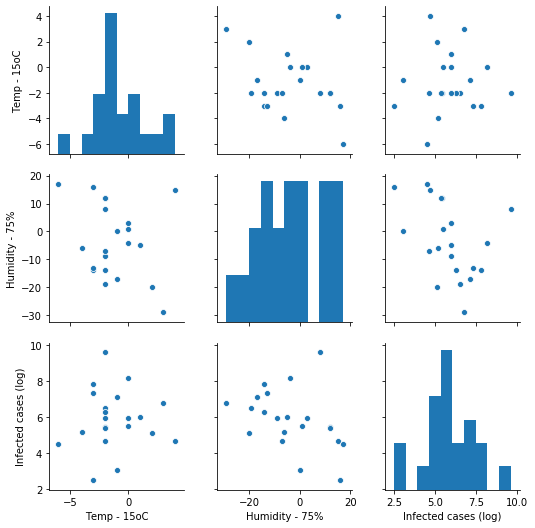

In [4]:
#Scatter plot of all relationships - the distribution of infected cases are more spread out after log transformation

pairs = sns.pairplot(italy_df)

In [5]:
#Create features and target 

target = italy_df.loc[:,'Infected cases (log)']
features = italy_df.loc[:, 'Temp - 15oC':'Humidity - 75%']

In [6]:
#Estimate relationship with naive OLS

result = OLS(target, features, hasconst=False).fit()
print(result.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Infected cases (log)   R-squared (uncentered):                   0.341
Model:                              OLS   Adj. R-squared (uncentered):              0.272
Method:                   Least Squares   F-statistic:                              4.918
Date:                  Tue, 17 Mar 2020   Prob (F-statistic):                      0.0190
Time:                          09:30:39   Log-Likelihood:                         -63.348
No. Observations:                    21   AIC:                                      130.7
Df Residuals:                        19   BIC:                                      132.8
Df Model:                             2                                                  
Covariance Type:              nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [361]:
#Interpret log-transformation in linear model 
#For every one-unit increase in the independent variable, the number of covid-19 cases decreases by about 67%.

temp_effect = (np.exp(result.params[0]) - 1) * 100
temp_effect

-67.14369936724567

In [7]:
#Interpret log-transformation in linear model for humidity
#For every one-unit increase in the independent variable, the number of covid-19 cases decreases by about 16%.

humid_effect = (np.exp(result.params[1]) - 1) * 100
humid_effect

-16.256298329249507

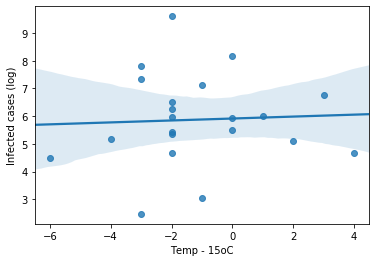

In [8]:
#Scatter plot between the number of cases and temperature 

sns.regplot(x=features.iloc[:,0], y=target, data=italy_df)

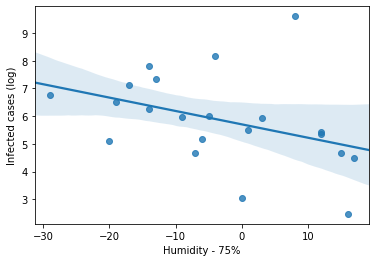

In [9]:
#Scatter plot between the number of cases and temperature 

sns.regplot(x=features.iloc[:,1], y=target, data=df)

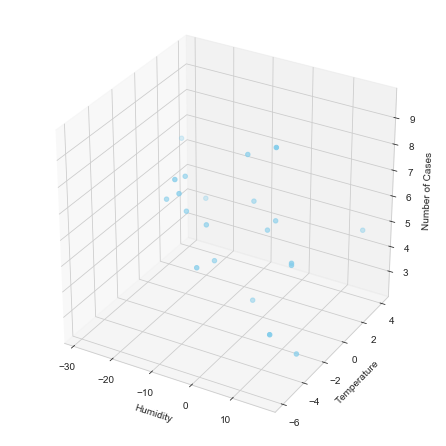

In [10]:
#3D plot the relationship 

from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

ax.scatter(features.iloc[:,1], features.iloc[:,0], target, c='skyblue', marker='o')
ax.set_xlabel('Humidity')
ax.set_ylabel('Temperature')
ax.set_zlabel('Number of Cases')

plt.show()


In [11]:
#Add 1 case to Valle d'Aosta 14 days ago to prevent division by 0
df.iloc[-3,3] = 1

#Engineer growth rate variable
y = np.log(df.iloc[:, 0]/df.iloc[:, 3])
y.name = 'Growth rate'

italy_df_growth = pd.merge(left = x, right = y, left_on= x.index, right_on= y.index)
italy_df_growth
#df.iloc[-2, 3] = 1

target = italy_df_growth.loc[:,'Growth rate']
features = italy_df_growth.loc[:, 'Temp - 15oC':'Humidity - 75%']

res = OLS(target,features, hasconst=False).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            Growth rate   R-squared (uncentered):                   0.232
Model:                            OLS   Adj. R-squared (uncentered):              0.151
Method:                 Least Squares   F-statistic:                              2.863
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                      0.0819
Time:                        09:30:57   Log-Likelihood:                         -53.484
No. Observations:                  21   AIC:                                      111.0
Df Residuals:                      19   BIC:                                      113.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [12]:
italy_df_growth

,key_0,Temp - 15oC,Humidity - 75%,Growth rate
0,Lombardia,-2,8,2.265662
1,Emilia Romagna,0,-4,2.126530
2,Veneto,-3,-14,2.086340
3,Marche,-1,-17,3.013604
4,Piemonte,-3,-13,3.298479
5,Toscana,3,-29,3.819446
6,Liguria,-2,-19,3.324736
7,Lazio,-2,-14,3.620524
8,Friuli Venezia Giulia,-2,-9,3.390888
9,Trento,0,3,4.548600


### Plot temperature, humidity and the number of cases on a map

In [13]:
import geopandas
import os
path = '/Users/dangngochuy/Downloads/covid19-master/Italy_shapefiles'
os.chdir(path)

In [14]:
import geopandas as gpd
geodf = gpd.read_file("gadm36_ITA_1.shp", index_col = 3)

In [15]:
geodf

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,ITA,Italy,ITA.1_1,Abruzzo,Abruzos|Abruzzen|Abruzzes|Abruzzi,None,Regione,Region,13,None,"POLYGON ((14.53183 41.80166, 14.53246 41.80097..."
1,ITA,Italy,ITA.2_1,Apulia,Apulien|Pouilles|Pouille|Puglia|Puglie,None,Regione,Region,16,None,"MULTIPOLYGON (((17.94931 40.05375, 17.94931 40..."
2,ITA,Italy,ITA.3_1,Basilicata,Basilicate|Lucania,None,Regione,Region,17,None,"MULTIPOLYGON (((15.71736 39.96792, 15.71736 39..."
3,ITA,Italy,ITA.4_1,Calabria,Calabre|Calabrie|Kalabrien,None,Regione,Region,18,None,"MULTIPOLYGON (((15.80208 39.70014, 15.80208 39..."
4,ITA,Italy,ITA.5_1,Campania,Campanha|Campanie|Kampanien,None,Regione,Region,15,None,"MULTIPOLYGON (((13.93197 40.74681, 13.93514 40..."
5,ITA,Italy,ITA.6_1,Emilia-Romagna,Emilia Romagna|Emilia|Emilia-Romaña|Émilie-Rom...,None,Regione,Region,8,None,"MULTIPOLYGON (((12.41045 43.89840, 12.40637 43..."
6,ITA,Italy,ITA.7_1,Friuli-Venezia Giulia,Friuli Venezia Giulia|Friuli-Venecia Julia,None,Regione,Autonomous Region,6,None,"MULTIPOLYGON (((13.31625 45.69347, 13.31625 45..."
7,ITA,Italy,ITA.8_1,Lazio,Lacio|Latium,None,Regione,Region,12,None,"MULTIPOLYGON (((13.45514 40.79264, 13.45514 40..."
8,ITA,Italy,ITA.9_1,Liguria,Ligurie|Ligurien,None,Regione,Region,7,None,"MULTIPOLYGON (((9.84792 44.02930, 9.84792 44.0..."
9,ITA,Italy,ITA.10_1,Lombardia,Lombardy|Lombardei|Lombardie,None,Regione,Region,3,None,"MULTIPOLYGON (((8.70649 45.02543, 8.70675 45.0..."


In [17]:
#Combine Trento and Bolzano into Trentino-Alto Adige region and take the average of the two 

italy_df.reset_index().replace({'key_0': {'Bolzano': 'Trento'}}).groupby('key_0', sort=False).sum()
italy_df = italy_df[italy_df.key_0 != 'Bolzano']


In [18]:
geodf.NAME_1
geodf["NAME_1"].replace({"Apulia": "Puglia", "Emilia-Romagna": "Emilia Romagna", "Friuli-Venezia Giulia": "Friuli Venezia Giulia", "Sicily": "Sicilia"}, inplace=True)
italy_df["key_0"].replace({"Trento":"Trentino-Alto Adige"}, inplace=True)

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
italy_df

,key_0,Temp - 15oC,Humidity - 75%,Infected cases (log)
0,Lombardia,-2,8,9.592127
1,Emilia Romagna,0,-4,8.166784
2,Veneto,-3,-14,7.813187
3,Marche,-1,-17,7.124478
4,Piemonte,-3,-13,7.323831
5,Toscana,3,-29,6.763885
6,Liguria,-2,-19,6.502790
7,Lazio,-2,-14,6.259581
8,Friuli Venezia Giulia,-2,-9,5.955837
9,Trentino-Alto Adige,0,3,5.934894


In [20]:
final_merged_df = pd.merge(left = italy_df, right = geodf, left_on= 'key_0', right_on= 'NAME_1')
final_merged_df

,key_0,Temp - 15oC,Humidity - 75%,Infected cases (log),GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,Lombardia,-2,8,9.592127,ITA,Italy,ITA.10_1,Lombardia,Lombardy|Lombardei|Lombardie,None,Regione,Region,3,None,"MULTIPOLYGON (((8.70649 45.02543, 8.70675 45.0..."
1,Emilia Romagna,0,-4,8.166784,ITA,Italy,ITA.6_1,Emilia Romagna,Emilia Romagna|Emilia|Emilia-Romaña|Émilie-Rom...,None,Regione,Region,8,None,"MULTIPOLYGON (((12.41045 43.89840, 12.40637 43..."
2,Veneto,-3,-14,7.813187,ITA,Italy,ITA.20_1,Veneto,Venecia|Venetia|Venezia Euganea,None,Regione,Region,5,None,"MULTIPOLYGON (((12.41625 44.82875, 12.41625 44..."
3,Marche,-1,-17,7.124478,ITA,Italy,ITA.11_1,Marche,Marches|Marca,None,Regione,Region,11,None,"POLYGON ((13.19071 42.73443, 13.18863 42.73454..."
4,Piemonte,-3,-13,7.323831,ITA,Italy,ITA.13_1,Piemonte,Piemont|Piémont|Piemonte|Piedmont,None,Regione,Region,1,None,"POLYGON ((9.19909 44.65079, 9.19972 44.64971, ..."
5,Toscana,3,-29,6.763885,ITA,Italy,ITA.16_1,Toscana,Tuscany|Toscane|Toskana,None,Regione,Region,9,None,"MULTIPOLYGON (((11.11042 42.26347, 11.11042 42..."
6,Liguria,-2,-19,6.502790,ITA,Italy,ITA.9_1,Liguria,Ligurie|Ligurien,None,Regione,Region,7,None,"MULTIPOLYGON (((9.84792 44.02930, 9.84792 44.0..."
7,Lazio,-2,-14,6.259581,ITA,Italy,ITA.8_1,Lazio,Lacio|Latium,None,Regione,Region,12,None,"MULTIPOLYGON (((13.45514 40.79264, 13.45514 40..."
8,Friuli Venezia Giulia,-2,-9,5.955837,ITA,Italy,ITA.7_1,Friuli Venezia Giulia,Friuli Venezia Giulia|Friuli-Venecia Julia,None,Regione,Autonomous Region,6,None,"MULTIPOLYGON (((13.31625 45.69347, 13.31625 45..."
9,Trentino-Alto Adige,0,3,5.934894,ITA,Italy,ITA.17_1,Trentino-Alto Adige,Trentino - Alto Adige|Trentino-Alto Adigio|Tre...,None,Regione,Autonomous Region,4,None,"POLYGON ((11.68530 45.98497, 11.68681 45.97018..."


In [21]:
final_merged_df.drop(final_merged_df.iloc[:, 4:14], axis = 1, inplace = True) 
final_merged_df

,key_0,Temp - 15oC,Humidity - 75%,Infected cases (log),geometry
0,Lombardia,-2,8,9.592127,"MULTIPOLYGON (((8.70649 45.02543, 8.70675 45.0..."
1,Emilia Romagna,0,-4,8.166784,"MULTIPOLYGON (((12.41045 43.89840, 12.40637 43..."
2,Veneto,-3,-14,7.813187,"MULTIPOLYGON (((12.41625 44.82875, 12.41625 44..."
3,Marche,-1,-17,7.124478,"POLYGON ((13.19071 42.73443, 13.18863 42.73454..."
4,Piemonte,-3,-13,7.323831,"POLYGON ((9.19909 44.65079, 9.19972 44.64971, ..."
5,Toscana,3,-29,6.763885,"MULTIPOLYGON (((11.11042 42.26347, 11.11042 42..."
6,Liguria,-2,-19,6.502790,"MULTIPOLYGON (((9.84792 44.02930, 9.84792 44.0..."
7,Lazio,-2,-14,6.259581,"MULTIPOLYGON (((13.45514 40.79264, 13.45514 40..."
8,Friuli Venezia Giulia,-2,-9,5.955837,"MULTIPOLYGON (((13.31625 45.69347, 13.31625 45..."
9,Trentino-Alto Adige,0,3,5.934894,"POLYGON ((11.68530 45.98497, 11.68681 45.97018..."


In [122]:
#Install libraries for geospatial data wrangling and analysis

#Geopandas for wrangling
#!pip install geopandas


#Contextily for basemap plotting 
#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
#!pip install cython
#!pip install cartopy
#!pip3 install contextily==1.0rc2
#!pip install descartes
#!pip install mapclassify

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pip/_internal/req/req_install.py:407: UserWarning: Unbuilt egg for Unknown [unknown version] (/Users/dangngochuy/anaconda3/lib/python3.6/site-packages)
  self.satisfied_by = pkg_resources.get_distribution(str(no_marker))
     |████████████████████████████████| 51kB 1.2MB/s eta 0:00:011
  Created wheel for mapclassify: filename=mapclassify-2.2.0-cp36-none-any.whl size=47030 sha256=d591caa3dac029d96417c294cb72ed1a3aa193258c28dacd5c380ecafec3e538
  Stored in directory: /Users/dangngochuy/Library/Caches/pip/wheels/96/0c/c1/b2bce9fc10da2e6c6befc9fe5929adca7c71b7c4abd1fc42f0
Successfully built mapclassify
ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 

In [23]:
import geopandas
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
import geopandas
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import contextily
import pylab as plot


In [24]:
final_merged_df = GeoDataFrame(final_merged_df) 

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


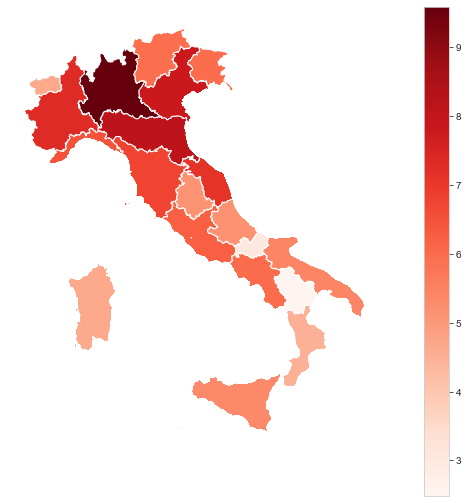

In [26]:
final_merged_df.crs = {'init' :'epsg:4326'}
ax = final_merged_df.to_crs(epsg=3857).plot(column='Infected cases (log)', cmap = 'Reds', figsize=(15,9), k=3, legend = True);
#ax.set_title("Confirmed Covid19 cases in Italy, by region", fontsize = 15, verticalalignment='center')
ax.set_axis_off()
plt.show()

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


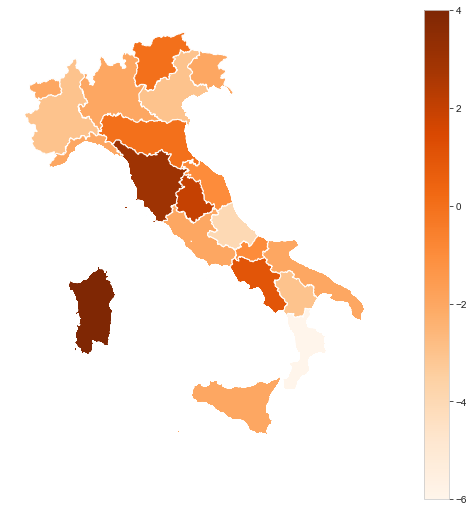

In [27]:
final_merged_df.crs = {'init' :'epsg:4326'}
ax = final_merged_df.to_crs(epsg=3857).plot(column='Temp - 15oC', cmap = 'Oranges', figsize=(15,9), k=3, legend = True)
#ax.set_title("Temperature over 15oC in Italy, by region", fontsize=25);
ax.set_axis_off()
plt.show()

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


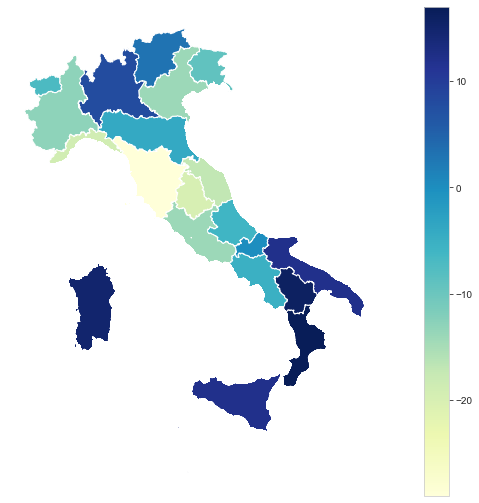

In [28]:
final_merged_df.crs = {'init' :'epsg:4326'}
ax = final_merged_df.to_crs(epsg=3857).plot(column='Humidity - 75%', cmap = 'YlGnBu', figsize=(15,9), k=3, legend = True);
#ax.set_title("Humidity over 75% in Italy, by region", fontsize=25);
ax.set_axis_off()
plt.show()